10.009999999999831 2.3313668141597206
10.009999999999831 11.73098997365268
9.999999999999831 2.3345012997993733
9.999999999999831 11.704824662388459
9.989999999999831 2.337627771809492
9.989999999999831 11.678681151421047
9.979999999999832 2.340746196982207
9.979999999999832 11.652559649131513
9.969999999999832 2.343856542330049
9.969999999999832 11.626460362985197
9.959999999999832 2.346958775086807
9.959999999999832 11.600383499526234
9.949999999999832 2.350052862708373
9.949999999999832 11.574329264372134
9.939999999999833 2.353138772873567
9.939999999999833 11.548297862208436
9.929999999999833 2.3562164734849524
9.929999999999833 11.52228949678344
9.919999999999833 2.3592859326696334
9.919999999999833 11.496304370902992
9.909999999999833 2.362347118780037
9.909999999999833 11.470342686425358
9.899999999999833 2.3654000003946822
9.899999999999833 11.444404644256155
9.889999999999834 2.368444546318933
9.889999999999834 11.41849044434336
9.879999999999834 2.371480725585736
9.879999999

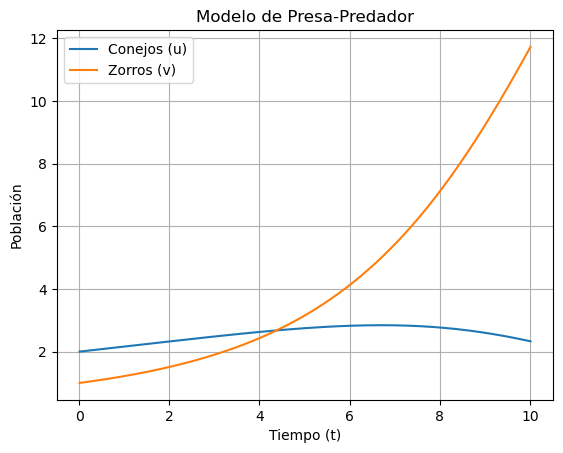

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Definición de puntos iniciales y finales
punto_inicial = 0.0
u = 2.0
v = 1.0
punto_final = 10.0
n = 1000  # Número de divisiones
h = (punto_final - punto_inicial) / n  # Paso
puntos = []
puntos_sol = []

# Parámetros para el problema de los conejos y los zorros
p = 0.1
q = 0.02
r = 0.01
s = 0.1

# Funciones del sistema de ecuaciones
def funcionx(x, u, v):
    return p * u - q * u * v

def funciony(x, u, v):
    return -r * v + s * u * v

# Iteración del método de Runge-Kutta
def iteracion(x, u, v, fx, fy):
    k11 = fx(x, u, v)
    k12 = fy(x, u, v)
    k21 = fx(x + h/2, u + (h/2)*k11, v + (h/2)*k12)
    k22 = fy(x + h/2, u + (h/2)*k11, v + (h/2)*k12)
    k31 = fx(x + h/2, u + (h/2)*k21, v + (h/2)*k22)
    k32 = fy(x + h/2, u + (h/2)*k21, v + (h/2)*k22)
    k41 = fx(x + h, u + h*k31, v + h*k32)
    k42 = fy(x + h, u + h*k31, v + h*k32)
    
    a1 = 1/6
    a2 = 1/3
    a3 = 1/3
    a4 = 1/6
    
    if x > punto_final:
        return x, u
    x1 = x + h
    u1 = u + h*(a1*(k11) + a2*(k21) + a3*(k31) + a4*(k41))
    v1 = v + h*(a1*(k12) + a2*(k22) + a3*(k32) + a4*(k42)) 
    iteracion(x1, u1, v1, fx, fy)
    puntos.append((x1, u1))
    puntos_sol.append((x1, v1))
    print(x1, u1)
    print(x1, v1)
    return x1, u1, v1

# Gráfica de los resultados
def grafica(puntos, puntos_sol):
    x1 = [i[0] for i in puntos]
    y1 = [i[1] for i in puntos]
    x2 = [i[0] for i in puntos_sol]
    y2 = [i[1] for i in puntos_sol]
    plt.plot(x1, y1, label='Conejos (u)')
    plt.plot(x2, y2, label='Zorros (v)')
    plt.xlabel('Tiempo (t)')
    plt.ylabel('Población')
    plt.title('Modelo de Presa-Predador')
    plt.legend()
    plt.grid(True)
    plt.show()

# Ejecutar el método de Runge-Kutta y mostrar la gráfica
iteracion(punto_inicial, u, v, funcionx, funciony)
grafica(puntos, puntos_sol)
